# MSDS 432, Assignment 2 - Selection Sort

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [3]:
np.random.seed(323) # static seed so results are reproducible

## Sort Algorithms

In [19]:
def findSmallest(arr):
    """Finds the smallest element in an array by returning the corresponding index."""
    smallest = arr[0] # Stores the smallest value
    smallest_index = 0 # Stores the smallest index
    
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index

def selectionSort(arr):
    """Selection Sort Algorithm, O(N**2)"""
    newArr = []
    for i in range(len(arr)):
        smallest = findSmallest(arr)
        newArr.append(arr.pop(smallest))
    return newArr

def insertionSort(arr):
    """Insertion Sort Algorithm, O(N**2)"""

    for i in range(len(arr)):
        j = i
        while j > 0 and (arr[j] <arr[j-1]):
            arr[j], arr[j-1] = arr[j-1], arr[j]
            j = j - 1
    return arr

def profile(func):
    """Utility function to help profile the runtime of code blocks."""
    start_time = time()
    func()
    return time() - start_time

## Benchmark

In [10]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Length', 'Selection Sort', 'Insertion Sort', 'Tim Sort'])

In [54]:
increment = 5000

for index in range(1, 6):
    array_size = index * increment # calculate array size
    
    ds = list(np.random.uniform(0, 9, array_size)) # generate it
    
    ss_time = profile(lambda: selectionSort(ds[:])) # Selection Sort
    is_time = profile(lambda: insertionSort(ds[:])) # Insertion Sort
    ts_time = profile(lambda: ds[:].sort()) # Tim Sort (Python library)
    
    results.loc[index] = [array_size, ss_time, is_time, ts_time]

## Results

In [55]:
results # display the results table / DataFrame

,Length,Selection Sort,Insertion Sort,Tim Sort
1,5000.0,0.527999,1.385972,0.001029
2,10000.0,2.122626,5.497332,0.002024
3,15000.0,4.766049,12.604141,0.003003
4,20000.0,8.541388,23.225201,0.005002
5,25000.0,13.521262,35.603499,0.006000


## Summary

The three sorting algorithms compared in this lab are insertion sort, selection sort and timsort, Python’s built-in sorting algorithm which is a hybrid derived from insertion sort and merge sort. The three algorithms perform drastically different run-time behavior in a simulation environment, even though two of the algorithms under study, insertion sort and selection sort, have the same asymptotic complexity (n²).

Insertion sort works by examining each element in the array, and repeatedly attempts to swap it with the previous element if the ‘cursor’ element is smaller than the one it’s being compared to. The “Big-O” runtime analysis of this algorithms is n² due to the algorithm having to compare n elements against n elements; even though the actual number of comparisons could be reduced drastically if the input array was already sorted. We must assume the worst case for this analysis, and that leads us to O(n²).
Selection sort is similar in approach to insertion sort in that its asymptotic complexity is n² due to each element being compared to every other element, however selection sort takes a different approach in how it achieves the sorting. Selection sort creates a new array, finds the location of the smallest element and then inserts that element into the new, sorted, array then removing that element from the original input.

The sorting method that’s default in the Python language is noticeably faster under all conditions, and that’s due to the cleaver approach of how Python handles sorting. This method looks for naturally occurring ‘runs’ of already sorted elements in the list, and then uses a merge sort to merge the sorted runs into the final output. The run-time of Python’s default sort, timsort, is best case O(n) and worst-case O(n*log(n)).

All these approaches to sorting are both valid and useful for any data engineer to know. For example, as mentioned with insertion sort, if the engineer is confident that the list will be close to fully sorted naturally before calling a sort routine, then one should prefer the insertion method over the selection method, as the run-time will be drastically faster. However, as we see extremely clear in this example, when there is an implementation of a common algorithm available in the base libraries of the language, it’s often best to defer to the out of the box implementations instead of rolling your own unless you have extremely clear requirements on why you should do so.

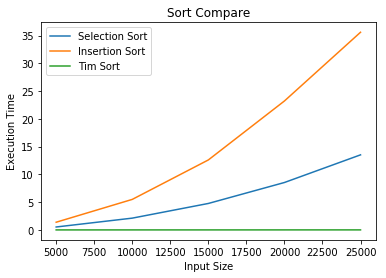

In [56]:
# Chart the relevant metrics about the three algorithms in comparision.
ax = results[['Length', 'Selection Sort', 'Insertion Sort', 'Tim Sort']].plot.line(x='Length', title='Sort Compare')
ax.set_xlabel('Input Size')
ax.set_ylabel('Execution Time')
plt.show()